In [1]:
# Fourier Transforms 

import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [3]:
def func_fft(func, df=1, norm='ortho'):
    '''Compute the fourier transform of provided func series. Normalization used is 1/sqrt(N).
    func:Function array; 
    df= sample spacing, 
    Norm=Normalization of Fourier series - {ortho: 1/sqrt(N);    None = no Normalization}
    Warning - Do not directly use after np.fft.ift - func should be time shifted and normalized'''
    
    F = np.fft.fftshift(np.fft.fft(func, norm=norm))#fft_shift centers the frequencies around zero and FT around mean - Important
    freq = np.fft.fftshift(np.fft.fftfreq(len(func), d=df))
    return  [freq.real, F]


def func_ifft(func, dt=1, norm='ortho'):
    '''Compute the fourier transform of provided func series. Normalization used is 1/sqrt(N).
    func:Function array;  df= sample spacing
    Norm=Normalization of Fourier series - {ortho: 1/sqrt(N);    None = no Normalization}
    Warning - Do not directly use after np.fft.fft - func should be freq shifted and normalized'''
    
    f = np.fft.ifft(np.fft.ifftshift(func), norm=norm)
    time = np.fft.fftshift(np.fft.fftfreq(len(func), d=dt))
    return  [time.real, f]


def FourierTransform(time, foo, fmean = 0):
    
    t = np.copy(time)
    foo_t = np.copy(foo)
    dt_ = np.diff(t)
    if (np.amax(dt_) - np.amin(dt_)>1e-5):
        print("FFT >> Warning:time step is not constant size. Will create issue with Fourier Transform")
    
    dt = t[2]-t[1]
    #n = len(time)
    freq, foo_f = func_fft(foo_t, df=dt)
    freq = freq+fmean
    return [freq, foo_f]


def InvFourierTransform(freq, foo, tmean = 0):
    
    f = np.copy(freq)
    foo_f = np.copy(foo)
    df_ = np.diff(f)
    
    if (np.amax(df_) - np.amin(df_))>1e-5:
        print("IFFT >> Warning:time step is not constant size. Will create issue with Inverse Fourier Transform")
    
    df = f[2]-f[1]
    #n = len(time)
    t, foo_t = func_ifft(foo_f, dt=df)
    t = t + tmean
    return [t, foo_t]

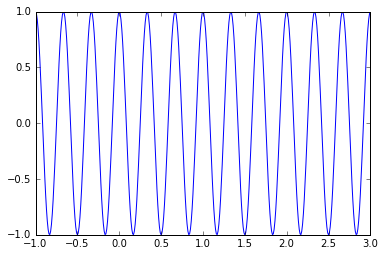

In [4]:
N =401
trange = 4.0
tmean = 1.
t = np.linspace(-trange/2. + tmean, trange/2 + tmean, N) 
dt = t[2]-t[1]
#print dt, t[0], t[-1]

func = lambda(x): (np.cos(2*np.pi*3.*x))

plt.plot(t, func(t))
plt.show()
plt.close()
#print t


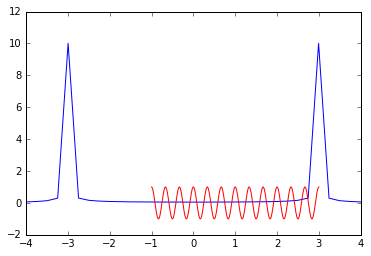

In [12]:
freq, func_f = FourierTransform(t,func(t))
time, func_t = InvFourierTransform(freq, func_f, tmean = tmean)

plt.plot(freq, np.abs(func_f), 'b')
#plt.plot(time, func_t.real, 'k--')
plt.plot(t, func(t), 'red')
plt.xlim(-4,4)
plt.show()
plt.close()


In [6]:
time_psi4, psi_re, psi_im = np.loadtxt('/localdata2/bkhamesra3/webpages/BBH/GW170108/BBH_Jan4event_UID4_M120-all/data/Ylm_WEYLSCAL4::Psi4_l2_m2_r75.00.asc', unpack=True, usecols=(0,1,2))

FFT >> Warning:time step is not constant size. Will create issue with Fourier Transform


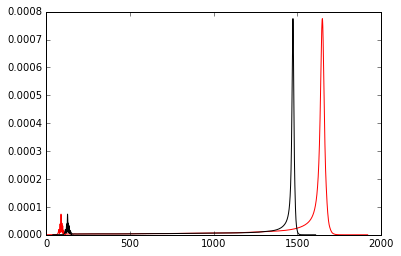

In [11]:
psi4 = psi_re + 1.j*psi_im
tmean = np.mean(time_psi4)
freq_psi, psi4_f = FourierTransform(time_psi4,psi4)
t_psi, psi4_t = InvFourierTransform(freq_psi, psi4_f, tmean=tmean)


#plt.plot(freq, np.abs(func_f), 'b')
plt.plot(time_psi4, np.abs(psi4),'red')
plt.plot(t_psi,np.abs(psi4_t), 'k')
#plt.xlim(-4,4)
plt.show()
plt.close()


In [10]:
dt = time_psi4[2] - time_psi4[1]
N = len(time_psi4)

print("Max time for dt = %f should be %f while current value is  %f"%(dt, N*dt, time_psi4[-1] ))

t_psi2 = np.arange(t_psi[0], N*dt, dt)
print t_psi2[-1], t_psi[-1]

Max time for dt = 0.133333 should be 1569.866667 while current value is  1919.733333
1569.76424891 1608.69758224
